In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
%run -i '../../../../../../utils.py'

# Get data

In [2]:
# read meta data
df_meta = pd.read_excel('../../../../../../our_data/meta_data.xlsx', index_col=0)
df_meta = df_meta[df_meta.Diet=='Inulin']
df_meta = df_meta.drop('Diet', axis=1)
df_meta = df_meta.rename({'MiceID':'SubjectID'}, axis=1)
df_meta.head()

,SubjectID,Vendor,Day,RandomizedGroup
SampleID,,,,
sample141,BI1,Beijing,0,A
sample142,BI2,Beijing,0,B
sample143,BI3,Beijing,0,D
sample144,BI4,Beijing,0,E
sample145,BI5,Beijing,0,C


In [3]:
# read SCFA data
df_scfa = pd.read_excel('../../../../../../our_data/SCFA.xlsx', index_col=0)
df_scfa.head()

,Acetate,Propionate,Butyrate
SampleID,,,
sample36,1.372492,0.463378,0.553858
sample86,2.019028,0.644090,0.757294
sample277,2.061243,1.140312,1.142147
sample116,2.066010,0.856857,0.582644
sample69,2.644383,0.955464,0.682562


In [4]:
# read bacterial abundance
df_bac = pd.read_excel('../../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)
df_bac = df_bac/df_bac.max().max()
df_bac.head()

,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,Acinetobacter-sp.-CIP-56.2,Acutalibacter-muris,Adlercreutzia-mucosicola,Adlercreutzia-muris,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,0.0,0.000291,0.000019,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000170,0.0,0.0,0.0,0.000444,0.0,0.0,0.0,0.000356
sample132,0.0,0.001090,0.000135,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000215,0.0,0.0,0.0,0.000286,0.0,0.0,0.0,0.002698
sample133,0.0,0.000097,0.000122,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000597,0.0,0.0,0.0,0.000502
sample134,0.0,0.001303,0.000027,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000285,0.0,0.0,0.0,0.002473,0.0,0.0,0.0,0.002344
sample135,0.0,0.000246,0.000114,0.0,0.0,0.0,0.0,0.0,0.000034,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.001565,0.0,0.0,0.0,0.001435


# Run RandomForest

In [5]:
for group_to_exclude in ['A','B','C','D']:
    df_rf_reg, df_rf_opt_paras, _ = train_scfa_dynamics_model(
        df_meta = df_meta, 
        df_bac = df_bac, 
        df_scfa = df_scfa, 
        target_scfa=['Acetate','Butyrate','Propionate'],
        topN=40,
        exclude_group=group_to_exclude,
        exclude_vendor=None,
        model='RandomForest',
        use_deriv_scfa=True,
        use_deriv_microbiome=True
    )
    df_rf_opt_paras.to_csv('optimal_rf_parameters_exclude_group%s.csv'%(group_to_exclude))
    df_rf_reg.to_csv('rf_regression_exclude_group%s.csv'%(group_to_exclude))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 21.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 21.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 21.7min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 18.1min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 17.7min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 19.1min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 15.4min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 18.9min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 18.9min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 19.6min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 18.9min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 15.3min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  9.6min finished


# Compare observed and predicted SCFA production

In [5]:
def predict_scfa_deriv(addVar,group_to_exclude):
    df_pred = None

    # get raw data
    df_meta = pd.read_excel('../../../../../our_data/meta_data.xlsx', index_col=0)
    df_meta = df_meta[df_meta.Diet=='Inulin']
    df_meta = df_meta.drop('Diet', axis=1)
    df_meta = df_meta.rename({'MiceID':'SubjectID'}, axis=1)
    df_scfa = pd.read_excel('../../../../../our_data/SCFA.xlsx', index_col=0)
    df_bac = pd.read_excel('../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)

    # get trained model
    target_scfa=['Acetate','Butyrate','Propionate']
    if addVar is not None:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_w_SCFA_exclude_group%s.csv'%(group_to_exclude), index_col=0)
    else:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_no_SCFA_exclude_group%s.csv'%(group_to_exclude), index_col=0)

    target_scfa_sliced, selected_topN_bac, df_meta_sliced, df_bac_sliced, df_bac_deriv, df_scfa_sliced, df_scfa_deriv = data_processing_scfa(
        df_meta, df_bac, df_scfa, target_scfa, topN=40, exclude_group=group_to_exclude, exclude_vendor=None, use_deriv_scfa=True, use_deriv_microbiome=True)

    _,_,reg = train_scfa_dynamics_model(
        df_meta=df_meta, # meta data
        df_bac=df_bac,  # relative abundace or absolute abundance of gut microbiome
        df_scfa=df_scfa, # SCFA measurement
        target_scfa=target_scfa, # dependent variable(s) in the regression
        topN=40, # keep only the most abundance N taxa in the model
        normalize_X=True, # normalize maximum of bacterial abundance to 1
        exclude_group=group_to_exclude, # group of mice excluded from model training
        exclude_vendor=None, # group of mice excluded from model training
        model='RandomForest',# regression model
        opt_params = df_opt_paras, # optimal model parameters
        addVar=addVar,
        use_deriv_scfa=True,
        use_deriv_microbiome=True
    )

    # predict SCFA derivative
    for scfa_ in target_scfa:
        df_pred_tmp = deepcopy(df_scfa_deriv)
        df_pred_tmp = df_pred_tmp[[x for x in df_pred_tmp.columns if x not in list(set(target_scfa)-set([scfa_]))]]
        df_pred_tmp = df_pred_tmp.rename({scfa_:'SCFA_deriv_observed'}, axis=1)
        df_pred_tmp['SCFA_mol'] = scfa_
        df_pred_tmp['SCFA_value_observed'] = df_scfa_sliced[scfa_]

        if addVar is not None:
            X_var = np.concatenate((np.asarray(df_bac_sliced.values), np.asarray(df_scfa_sliced[scfa_]).reshape(-1,1)), 1)
        else:
            X_var = np.asarray(df_bac_sliced.values)
        X_var = X_var/X_var.mi
        df_pred_tmp['SCFA_deriv_predicted'] = reg[scfa_].predict(X_var)

        if df_pred is None:
            df_pred = df_pred_tmp
        else:
            df_pred = pd.concat([df_pred, df_pred_tmp], ignore_index=True)

    return df_pred

In [11]:
df = None
for idx_j, group_to_exclude in enumerate(['A','B','C','D']):
    df_tmp = predict_scfa_deriv(addVar=False, group_to_exclude=group_to_exclude)
    if idx_j==0:
        df = df_tmp
    else:
        df = pd.concat([df, df_tmp], ignore_index=True)
df['RelativeError'] = (df['SCFA_deriv_predicted']-df['SCFA_deriv_observed'])/df['SCFA_deriv_observed']*100
df['RelativeAbsError'] = np.abs(df['RelativeError'])
df.to_csv('training_error_intrapolation_no_addVar.csv')
df.head()

,MiceID,Vendor,Day,RandomizedGroup,SCFA_deriv_observed,SCFA_mol,SCFA_value_observed,SCFA_deriv_predicted,RelativeError,RelativeAbsError
0,BI2,Beijing,0,B,18.463945,Acetate,13.459823,13.402313,-27.413599,27.413599
1,BI3,Beijing,0,D,23.205175,Acetate,18.075378,16.319659,-29.672328,29.672328
2,BI4,Beijing,0,E,2.137760,Acetate,12.580368,3.859875,80.556942,80.556942
3,BI5,Beijing,0,C,8.669110,Acetate,8.065127,8.044164,-7.208885,7.208885
4,BI2,Beijing,1,B,-0.893324,Acetate,21.180451,0.397431,-144.488998,144.488998


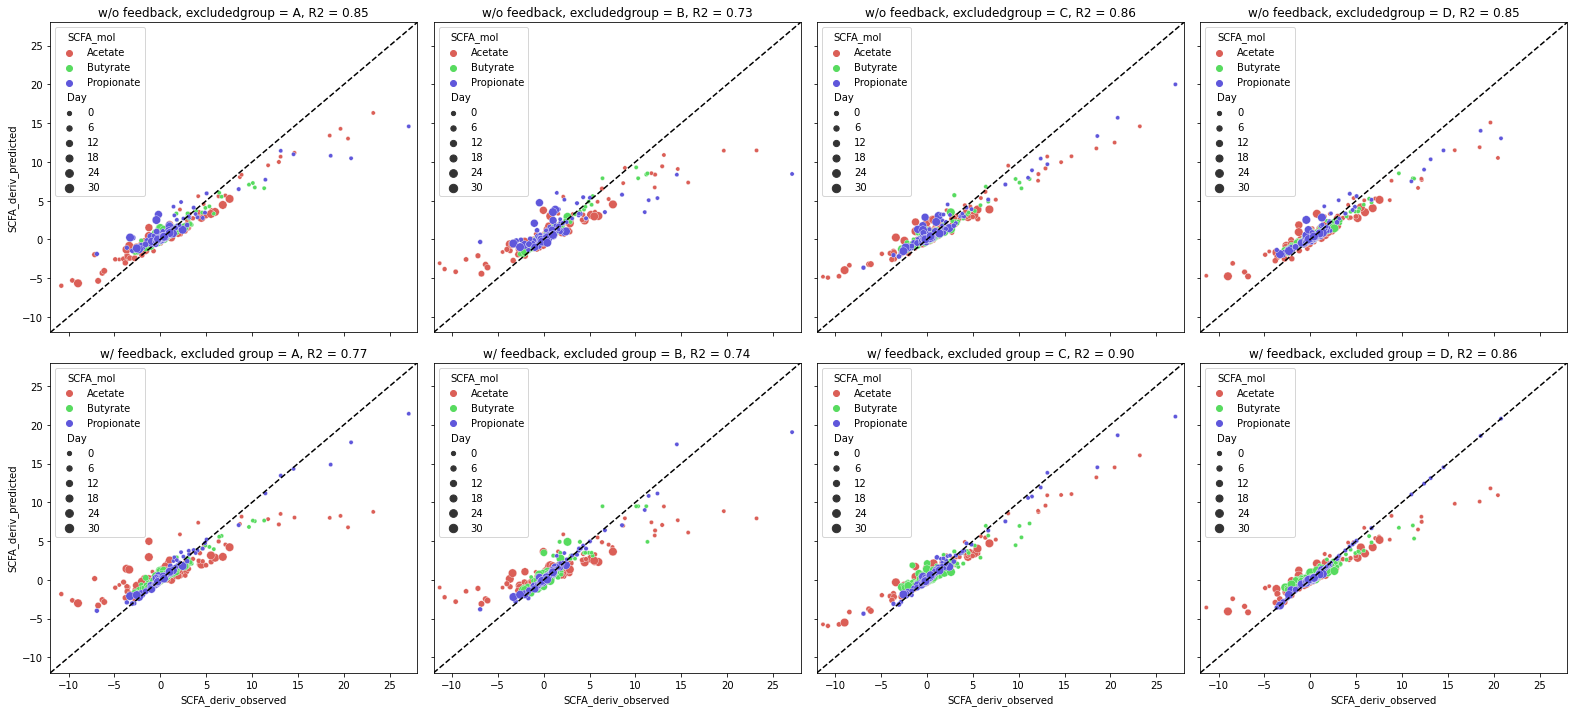

In [6]:
fig, ax = plt.subplots(figsize=(22,10), nrows=2, ncols=4, sharex=True, sharey=True)

for idx_i,addVar in enumerate([False, True]):
    for idx_j, group_to_exclude in enumerate(['A','B','C','D']):
        df_pred = predict_scfa_deriv(addVar=addVar, group_to_exclude=group_to_exclude)
        
        _ = sns.scatterplot(x='SCFA_deriv_observed',y='SCFA_deriv_predicted', hue='SCFA_mol', size='Day', palette=sns.color_palette("hls", 3), data=df_pred, ax=ax[idx_i,idx_j])
        _ = ax[idx_i,idx_j].plot([-12,28],[-12,28],'k--')
        _ = ax[idx_i,idx_j].set_xlim([-12,28])
        _ = ax[idx_i,idx_j].set_ylim([-12,28])
        if addVar:
            _ = ax[1,idx_j].set_title('w/ addVar, excluded group = %s, R2 = %2.2f'%(group_to_exclude,r2_score(df_pred.SCFA_deriv_observed, df_pred.SCFA_deriv_predicted)))
        else:
            _ = ax[0,idx_j].set_title('w/o addVar, excludedgroup = %s, R2 = %2.2f'%(group_to_exclude,r2_score(df_pred.SCFA_deriv_observed, df_pred.SCFA_deriv_predicted)))
            
plt.tight_layout()